In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('/Users/user/Downloads/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')
df2 = pd.read_csv('/Users/user/Downloads/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_test.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

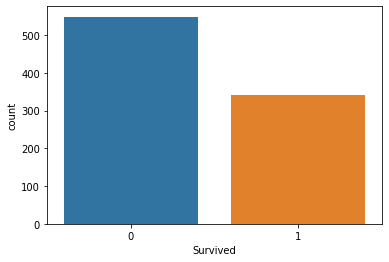

In [6]:
sns.countplot(x='Survived',data=df1)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

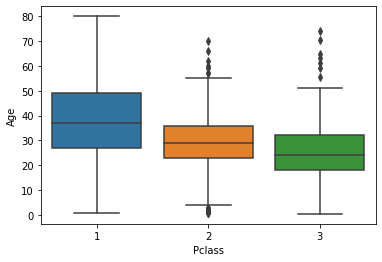

In [7]:
sns.boxplot(x='Pclass',y='Age',data=df1)

<AxesSubplot:xlabel='Survived', ylabel='count'>

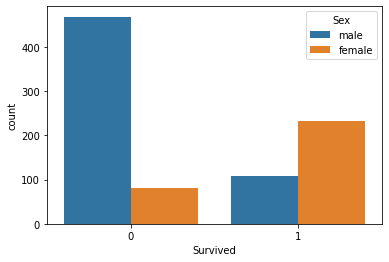

In [8]:
sns.countplot(x='Survived',hue='Sex',data=df1)

<AxesSubplot:xlabel='Survived', ylabel='count'>

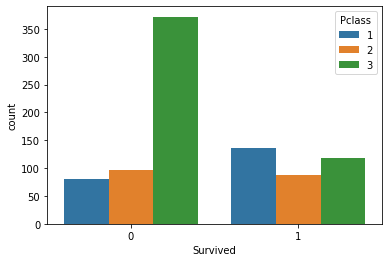

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=df1)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

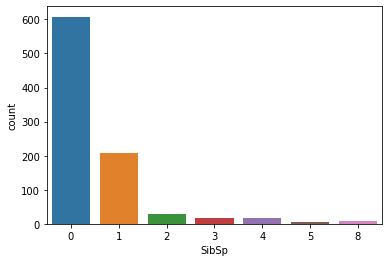

In [10]:
sns.countplot(x='SibSp',data=df1)

In [11]:
df1['Cabin'] = df1['Cabin'].astype(str)

In [12]:
df1['Cabin'] = df1['Cabin'].apply(lambda x:x[0])

<AxesSubplot:ylabel='Frequency'>

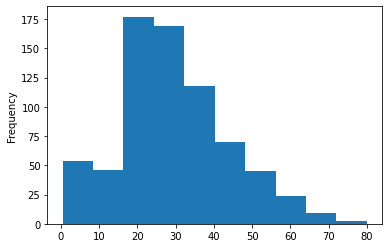

In [13]:
df1['Age'].plot(kind='hist')

In [14]:
import cufflinks as cf
cf.go_offline()

In [15]:
box_age = df1[['Pclass', 'Age']]
box_age.pivot(columns='Pclass', values='Age').iplot(kind='box')

In [16]:
df1['Age'].iplot(kind='hist')

<AxesSubplot:xlabel='Survived', ylabel='count'>

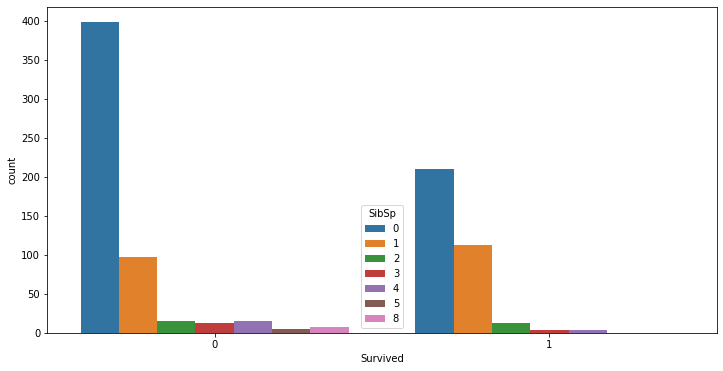

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='Survived',hue='SibSp',data=df1)

In [18]:
df1['Cabin'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [19]:
def letter_change(a):
    if a =='T':
        return 0
    elif a == 'C':
        return 1
    elif a == 'E':
        return 2
    elif a == 'G':
        return 3
    elif a == 'D':
        return 4
    elif a == 'A':
        return 5
    elif a == 'B':
        return 6
    elif a == 'F':
        return 7
    else:
        return 8

In [20]:
df2['Cabin'] = df2['Cabin'].astype(str)

In [21]:
df2['Cabin'] = df2['Cabin'].apply(lambda x:x[0])

In [22]:
df1['Cabin'] = df1['Cabin'].apply(letter_change)

In [23]:
df2['Cabin'] = df2['Cabin'].apply(letter_change)

In [24]:
df1.drop('Ticket',axis=1,inplace=True)

In [25]:
df2.drop('Ticket',axis=1,inplace=True)

In [26]:
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
df1.drop('PassengerId',axis=1,inplace=True)
df1.drop('Name',axis=1,inplace=True)
df1.drop('Embarked',axis=1,inplace=True)

In [28]:
df2.drop('PassengerId',axis=1,inplace=True)
df2.drop('Name',axis=1,inplace=True)
df2.drop('Embarked',axis=1,inplace=True)

In [29]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,8
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,8
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,8


In [30]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,male,34.5,0,0,7.8292,8
1,3,female,47.0,1,0,7.0000,8
2,2,male,62.0,0,0,9.6875,8
3,3,male,27.0,0,0,8.6625,8
4,3,female,22.0,1,1,12.2875,8


In [31]:
def change_gender(b):
    if b == 'male':
        return 0
    else:
        return 1

In [32]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [33]:
df1['Sex'] = df1['Sex'].apply(change_gender)
df2['Sex'] = df2['Sex'].apply(change_gender)
df1['Age'] = df1[['Age','Pclass']].apply(impute_age,axis=1)
df2['Age'] = df2[['Age','Pclass']].apply(impute_age,axis=1)

In [34]:
df2['Fare'].fillna(df2['Fare'].mean(),inplace=True)

In [35]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,0,22.0,1,0,7.2500,8
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,8
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,8


In [36]:
X1 = df1.drop('Survived',axis=1)
y1 = df1['Survived']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_test_split = X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression(solver='liblinear')

In [41]:
logmodel.fit(X1_train,y1_train)

LogisticRegression(solver='liblinear')

In [42]:
pred = logmodel.predict(X1_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y1_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [45]:
print(confusion_matrix(y1_test,pred))

[[95 15]
 [21 48]]


In [46]:
X1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  712 non-null    int64  
 1   Sex     712 non-null    int64  
 2   Age     712 non-null    float64
 3   SibSp   712 non-null    int64  
 4   Parch   712 non-null    int64  
 5   Fare    712 non-null    float64
 6   Cabin   712 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [47]:
pwd

'C:\\Users\\user\\Downloads\\Py_DS_ML_Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression'